In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import astropy.io.ascii

In [ ]:
def calculateOrbitalVelocity(M, R):
  """
  Calculates the orbital velocity of a body around a central object.
  Input:
  M: Mass of the central object
  R: Distance from the central object
  Output:
  Orbital velocity of the body
  """
  return np.sqrt((const.G * M / R))

def plot_rotation_curve(distances, masses, title = '', xlab = 'Orbital Distance (kpc)', ylab = 'Orbital Velocity (km/s)'):
  """
  Plots a rotation curve
  Input:
  distances - array of orbital distances
  masses - array containing encloed mass at each orbital distance
  title - title of the plot
  xlab - label for the x-axis
  ylab - label for the y-axis
  """
  plt.title(title)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  velocities = [calculateOrbitalVelocity(i, j) for (i, j) in zip(masses, distances)]
  velocities = u.Quantity(velocities, u.km/u.s) # convert array of quantities to single quantity
  plt.plot(distances, velocities)

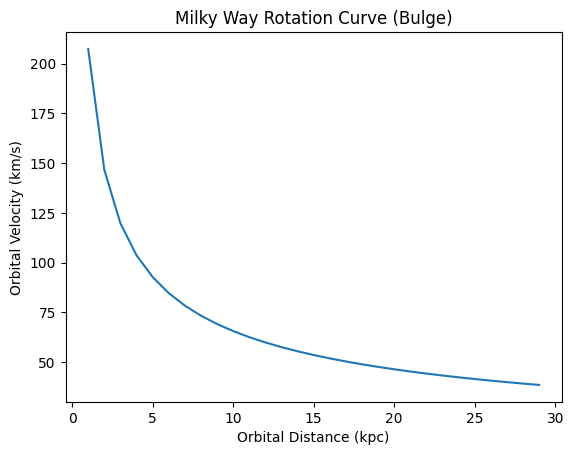

In [ ]:
orbital_distances = np.arange(1, 30) * u.kpc # create list of orbital distances from 1 to 30 kiloparsecs

mass_bulge = 1 * 10**10 * u.solMass # mass of central bulge
mass_bulge_array = np.full(len(orbital_distances), 1) * mass_bulge # list of 30 copies of bulge mass

plot_rotation_curve(orbital_distances, mass_bulge_array, 'Milky Way Rotation Curve (Bulge)')


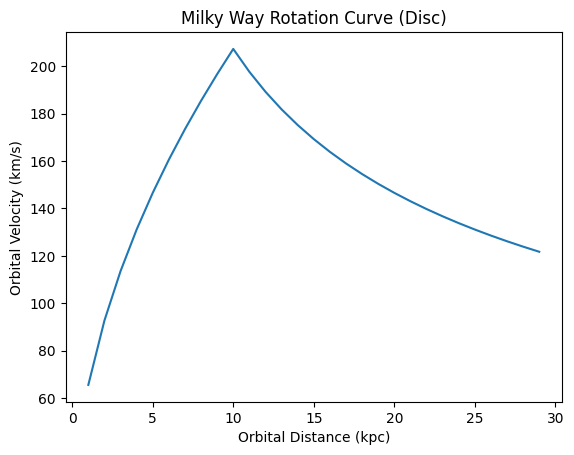

In [ ]:
# Find rotation curve, including the Milky Way disc

M_disc = 1e11 * u.solMass # mass of disc
R_disc = 8 * u.kpc # radius of disc
density_disc = M_disc / (np.pi * R_disc**2) # density of disc

def get_enclosed_disc_mass(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

enclosed_mass_disc = [get_enclosed_disc_mass(i) for i in orbital_distances] # calculate enclosed mass for the disk component

plot_rotation_curve(orbital_distances, enclosed_mass_disc, 'Milky Way Rotation Curve (Disc)')


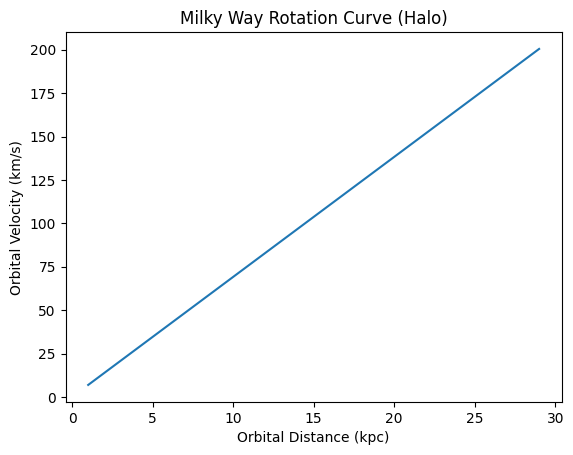

In [ ]:
# Find rotation curve, including halo
def get_enclosed_halo_mass(R, R_halo = 30 * u.kpc, M_halo = 3e11 * u.solMass):
  """
  Calculate enclosed mass for the halo component
  Input: R - orbital radius
  Output: M - enclosed mass
  """
  density_halo = M_halo / (4 / 3 * np.pi * (R_halo**3)) # density of halo
  if R < R_halo:
    M = (4 / 3) * np.pi * (R**3) * density_halo
  else:
    M = M_halo
  return(M)

enclosed_mass_halo = [get_enclosed_halo_mass(i) for i in orbital_distances] # calculate enclosed mass for the halo component

plot_rotation_curve(orbital_distances, enclosed_mass_halo, 'Milky Way Rotation Curve (Halo)')

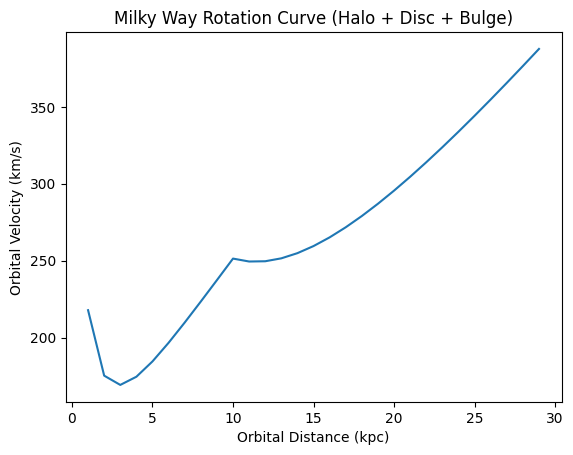

In [ ]:
plot_rotation_curve(orbital_distances, u.Quantity(enclosed_mass_halo) + u.Quantity(enclosed_mass_disc) + mass_bulge_array, 'Milky Way Rotation Curve (Halo + Disc + Bulge)')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


<ErrorbarContainer object of 3 artists>

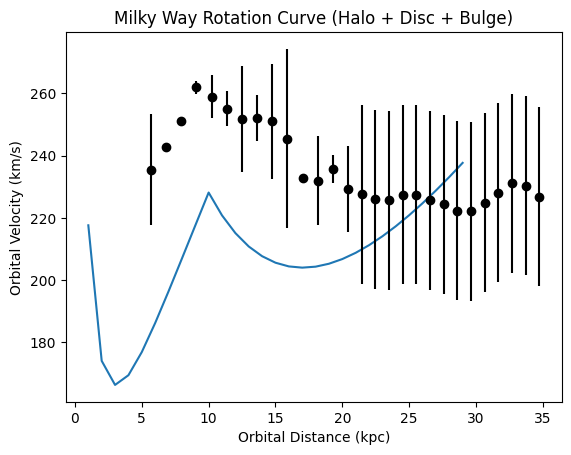

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

plot_rotation_curve(orbital_distances, u.Quantity(enclosed_mass_halo) + u.Quantity(enclosed_mass_disc) + mass_bulge_array, 'Milky Way Rotation Curve (Halo + Disc + Bulge)')
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
